# `Universal Bank`

# `Imports`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# `Load Dataset`

In [8]:
df = pd.read_csv(r'UniversalBank.csv')
display(df.head())
df.shape

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


(5000, 14)

In [9]:
df.drop(columns=['ID', 'ZIP Code'], inplace=True)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [10]:
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
df.head()

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 5000 non-null   int64  
 1   experience          5000 non-null   int64  
 2   income              5000 non-null   int64  
 3   family              5000 non-null   int64  
 4   ccavg               5000 non-null   float64
 5   education           5000 non-null   int64  
 6   mortgage            5000 non-null   int64  
 7   personal_loan       5000 non-null   int64  
 8   securities_account  5000 non-null   int64  
 9   cd_account          5000 non-null   int64  
 10  online              5000 non-null   int64  
 11  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [12]:
df.describe()

,age,experience,income,family,ccavg,education,mortgage,personal_loan,securities_account,cd_account,online,creditcard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

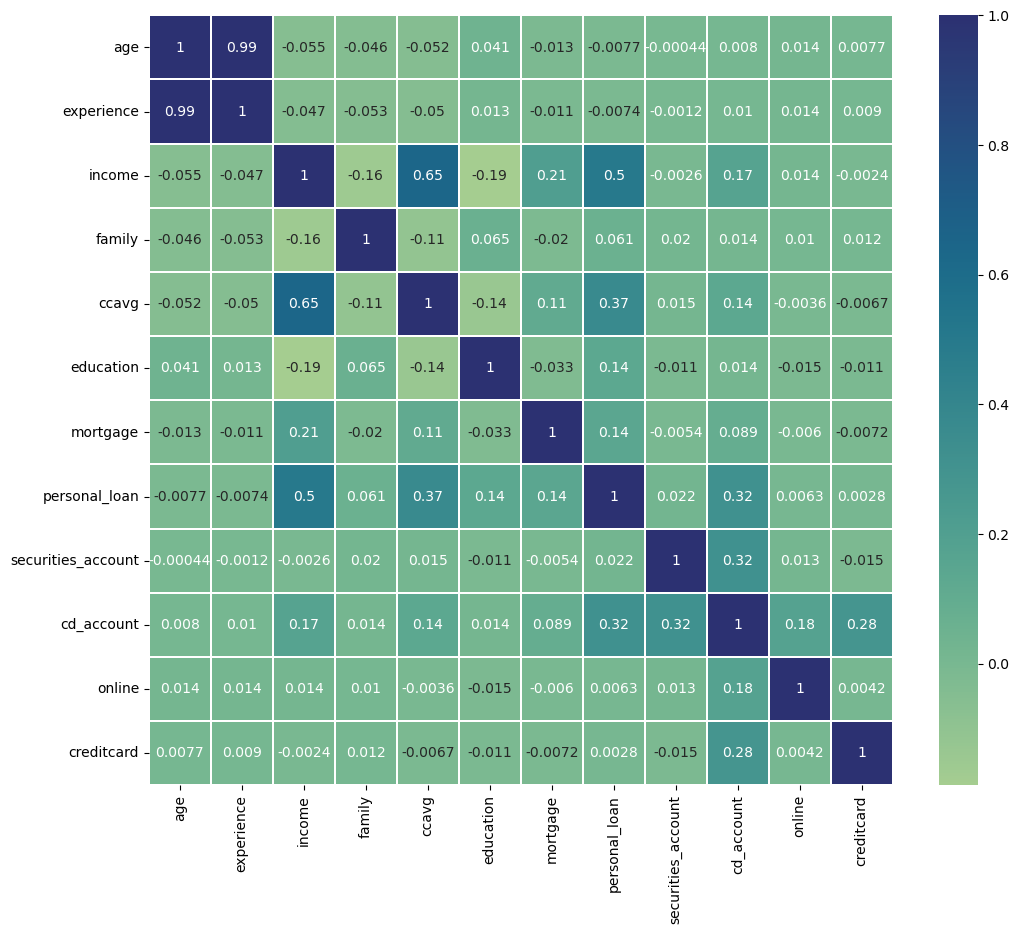

In [13]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='crest', linewidths=0.3)

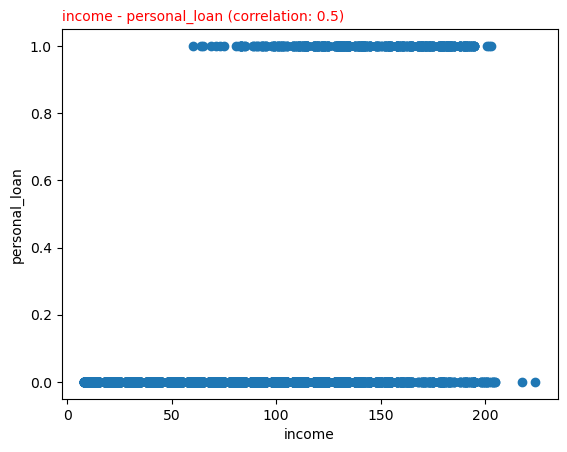

In [14]:
plt.scatter(df.income, df.personal_loan)
plt.xlabel('income')
plt.ylabel('personal_loan')
plt.title('income - personal_loan (correlation: 0.5)', loc='left', c='r', fontsize=10);

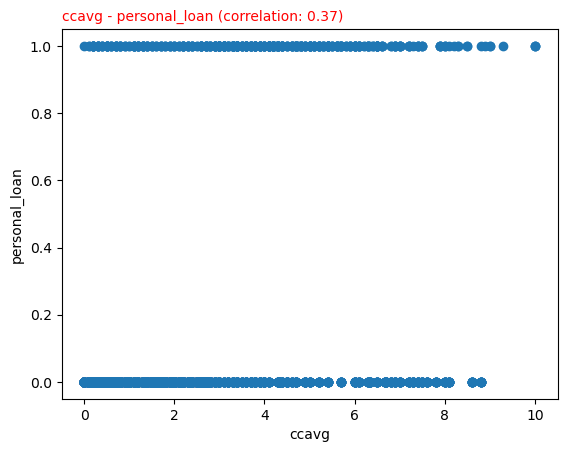

In [16]:
plt.scatter(df.ccavg, df.personal_loan)
plt.xlabel('ccavg')
plt.ylabel('personal_loan')
plt.title('ccavg - personal_loan (correlation: 0.37)', loc='left', c='r', fontsize=10);

In [17]:
df.personal_loan.value_counts()

personal_loan
0    4520
1     480
Name: count, dtype: int64

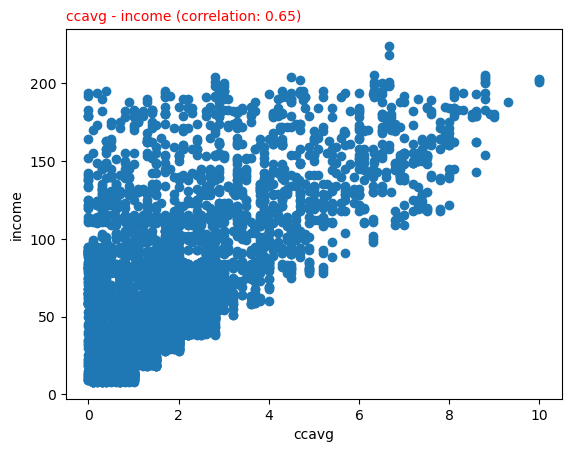

In [18]:
plt.scatter(df.ccavg, df.income)
plt.xlabel('ccavg')
plt.ylabel('income')
plt.title('ccavg - income (correlation: 0.65)', loc='left', c='r', fontsize=10);

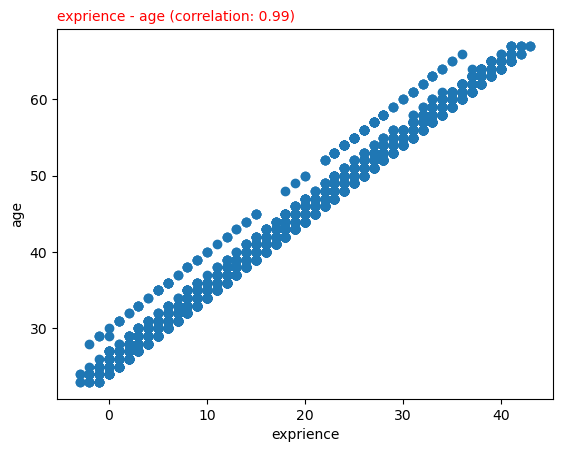

In [19]:
plt.scatter(df.experience, df.age)
plt.xlabel('exprience')
plt.ylabel('age')
plt.title('exprience - age (correlation: 0.99)', loc='left', c='r', fontsize=10);

In [20]:
X = df.drop(columns=['personal_loan']).values
y = df['personal_loan'].values
X, y

(array([[25.,  1., 49., ...,  0.,  0.,  0.],
        [45., 19., 34., ...,  0.,  0.,  0.],
        [39., 15., 11., ...,  0.,  0.,  0.],
        ...,
        [63., 39., 24., ...,  0.,  0.,  0.],
        [65., 40., 49., ...,  0.,  1.,  0.],
        [28.,  4., 83., ...,  0.,  1.,  1.]]),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

# `Train-Test Split`

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=10, stratify=y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3250, 11), (3250,), (1750, 11), (1750,))

(array([1582.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         168.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

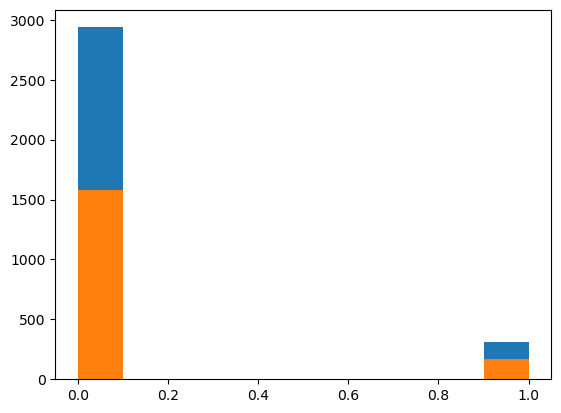

In [23]:
plt.hist(y_train)
plt.hist(y_test)

In [24]:
np.histogram(y_train, bins=2)

(array([2938,  312], dtype=int64), array([0. , 0.5, 1. ]))

In [19]:
# flags = y_train==0

# idx = np.random.randint(0, np.sum(flags), np.sum(~flags))
# x_train_c0 = x_train[flags, :]
# x_train_c0 = x_train_c0[idx, :]

# x_train_c1 = x_train[~flags, :]

# np.concatenate

# `Model`

In [25]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### `LogisticRegression()`

In [26]:
model_LogisticRegression = LogisticRegression(penalty=None, max_iter=5000, random_state=10)
model_LogisticRegression.fit(x_train, y_train)

LogisticRegression(max_iter=5000, penalty=None, random_state=10)

In [27]:
model_LogisticRegression.score(x_test, y_test) # accurancy

0.9485714285714286

In [28]:
print ('class 0: ', model_LogisticRegression.score(x_test[y_test==0], y_test[y_test==0]))
print ('class 1: ', model_LogisticRegression.score(x_test[y_test==1], y_test[y_test==1]))

class 0:  0.9860935524652339
class 1:  0.5952380952380952


In [29]:
model_LogisticRegression_ = LogisticRegression(penalty=None, max_iter=5000, random_state=10, class_weight='balanced')
model_LogisticRegression_.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=5000, penalty=None,
                   random_state=10)

In [30]:
model_LogisticRegression_.score(x_test, y_test) # accuarncy

0.8937142857142857

In [31]:
print ('class 0: ', model_LogisticRegression_.score(x_test[y_test==0], y_test[y_test==0]))
print ('class 1: ', model_LogisticRegression_.score(x_test[y_test==1], y_test[y_test==1]))

class 0:  0.8938053097345132
class 1:  0.8928571428571429


### `SGDClassifier()`

In [32]:
model_SGDClassifier = SGDClassifier(class_weight='balanced', random_state=42, loss='log_loss')
model_SGDClassifier.fit(x_train, y_train)

SGDClassifier(class_weight='balanced', loss='log_loss', random_state=42)

In [33]:
model_SGDClassifier.score(x_test, y_test) # accuarncy

0.88

In [34]:
print ('class 0: ', model_SGDClassifier.score(x_test[y_test==0], y_test[y_test==0]))
print ('class 1: ', model_SGDClassifier.score(x_test[y_test==1], y_test[y_test==1]))

class 0:  0.8868520859671302
class 1:  0.8154761904761905


# `Evaluation Metrics`

In [35]:
model_LogisticRegression_

LogisticRegression(class_weight='balanced', max_iter=5000, penalty=None,
                   random_state=10)

In [36]:
model_LogisticRegression_.predict(x_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
model_LogisticRegression_.predict_proba(x_test).argmax(axis=1)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
# model.predict_proba(x_test).argmax(axis=1)
y_hat = model_LogisticRegression_.predict_proba(x_test)[:, 1]

In [38]:
y_hat = model_LogisticRegression_.predict_proba(x_test)

In [45]:
x_temp = np.array([-1, 2, -1, 3])
np.where(x_temp<0, 0, 1)

array([0, 1, 0, 1])

In [46]:
t = 0.5
np.where(y_hat<t, 0, 1)

array([0, 1, 0, ..., 0, 0, 0])

In [41]:
from sklearn.metrics import confusion_matrix

In [47]:
y_pred = np.where(y_hat<t, 0, 1)
confusion_matrix(y_test, y_pred)

array([[1414,  168],
       [  18,  150]], dtype=int64)

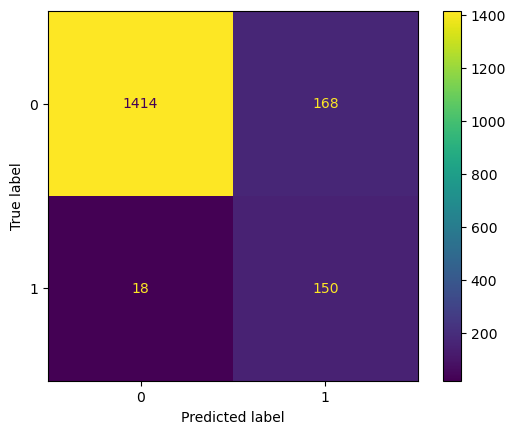

In [40]:
ConfusionMatrixDisplay.from_estimator(model_LogisticRegression_, x_test, y_test)

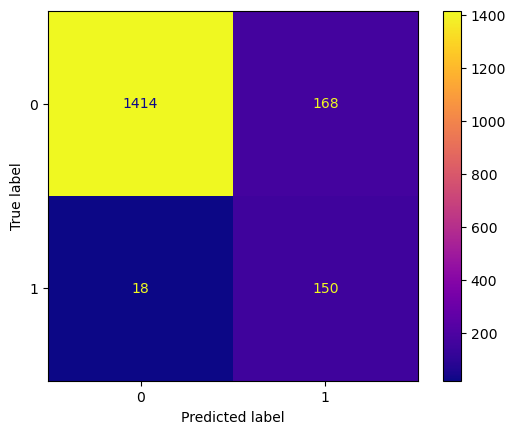

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,  cmap='plasma')

In [53]:
y_pred = np.where(y_hat<t, 0, 1)
(tn, fp), (fn, tp) = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp

(1414, 168, 18, 150)

In [54]:
np.sum((y_pred==1) & (y_test==0))

168

In [55]:
1 - (tp / (tp+fn))

0.1071428571428571

In [56]:
tpr = tp / (tp + fn)
tpr

0.8928571428571429

### `ROC Curve`

In [57]:
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
fpr.shape, tpr.shape, thresholds.shape

((149,), (149,), (149,))

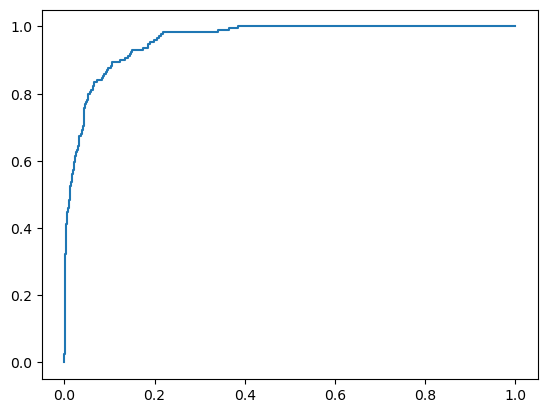

In [59]:
plt.plot(fpr, tpr)

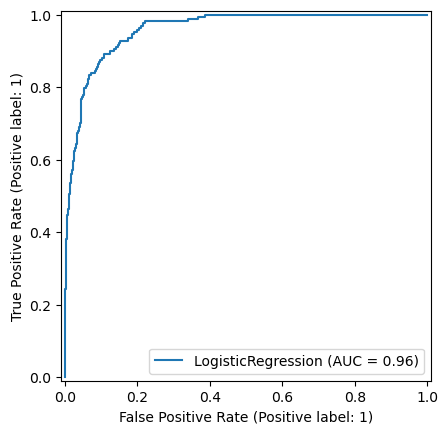

In [60]:
RocCurveDisplay.from_estimator(model_LogisticRegression_, x_test, y_test)

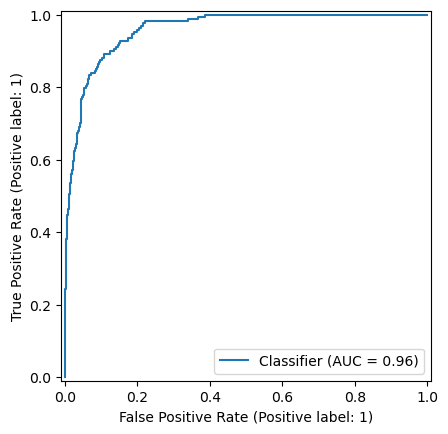

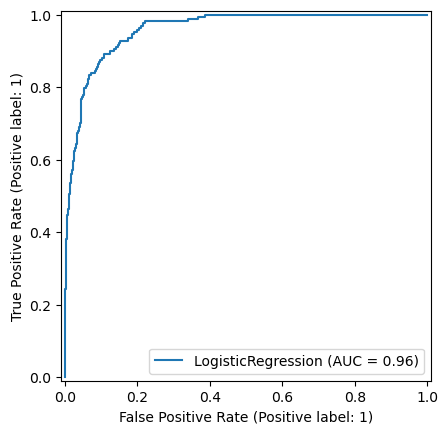

In [61]:
RocCurveDisplay.from_predictions(y_test, y_hat)
RocCurveDisplay.from_estimator(model_LogisticRegression_, x_test, y_test)

In [62]:
roc_auc_score(y_test, y_hat)

0.9593191258804407

### `Precision & Recall`

In [63]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, average_precision_score, PrecisionRecallDisplay, f1_score

In [64]:
precision_score(y_test, y_pred)

0.4716981132075472

In [65]:
tp / (tp+fn)

0.8928571428571429

In [66]:
tpr

array([0.        , 0.00595238, 0.02380952, 0.02380952, 0.1547619 ,
       0.1547619 , 0.24404762, 0.24404762, 0.32142857, 0.32142857,
       0.375     , 0.375     , 0.38095238, 0.38095238, 0.41071429,
       0.41071429, 0.42261905, 0.42261905, 0.44642857, 0.44642857,
       0.45833333, 0.45833333, 0.46428571, 0.46428571, 0.48214286,
       0.48214286, 0.50595238, 0.50595238, 0.51785714, 0.51785714,
       0.52380952, 0.52380952, 0.53571429, 0.53571429, 0.54166667,
       0.54166667, 0.54761905, 0.54761905, 0.55952381, 0.55952381,
       0.57142857, 0.57142857, 0.5952381 , 0.5952381 , 0.60119048,
       0.60119048, 0.61309524, 0.61309524, 0.625     , 0.625     ,
       0.63095238, 0.63095238, 0.63690476, 0.63690476, 0.64285714,
       0.64285714, 0.64880952, 0.64880952, 0.67261905, 0.67261905,
       0.67857143, 0.67857143, 0.68452381, 0.68452381, 0.69047619,
       0.69047619, 0.70238095, 0.70238095, 0.75      , 0.75      ,
       0.75595238, 0.75595238, 0.76785714, 0.76785714, 0.77380

In [67]:
recall_score(y_test, y_pred)

0.8928571428571429

In [68]:
precision, recall, thresholds = precision_recall_curve(y_test, y_hat)
precision.shape, recall.shape, thresholds.shape

((1748,), (1748,), (1747,))

# `END`